# Clustering

In [ ]:
# Import of required libraries and packages
import igraph as ig
import easygui
import numpy as np
import pandas as pd
import scipy
import statistics
import pandas as pd
import networkx as nx
import igraph as ig
from matplotlib import pyplot as plt
import leidenalg as la
import seaborn as sns
print(ig.__version__)

#Creating and empty Graph object
graph = ig.Graph()

0.9.1


In [ ]:
nx.write_graphml(G,'graph.graphml') # Export NX graph to file

voles = ig.read('graph.graphml',format="graphml") # Create new IG graph from file

In [ ]:
voles.summary()

'IGRAPH U-W- 1686 4623 -- \n+ attr: id (v), time (e), weight (e)'

In [ ]:
cc= voles.clusters(mode='WEAK')
print("number of connected components " + str(len(cc)))
cc = np.array(sorted(cc, key=len, reverse=True), dtype="object")
print("largest component is " + str(len(cc[0])) + " nodes big")
print("second largest component is " + str(len(cc[1])) + " nodes big")
voles_comp = voles.subgraph(cc[0])

number of connected components 31
largest component is 1613 nodes big
second largest component is 9 nodes big


In [ ]:
layout_fr = voles_comp.layout("fr")
layout_fr[2]

[4.20626795171416, 7.794335046679944]

In [ ]:
# Leading Eigenvector
lead_voles = voles_comp.community_leading_eigenvector()
lead_voles.modularity

0.7246905415973712

In [ ]:
## The leading eigenvector results in 16 clusters. 
k=len(lead_voles)
k

16

     |████████████████████████████████| 13.1MB 229kB/s 
ERROR: nxviz 0.6.3 has requirement matplotlib>=3.3.3, but you'll have matplotlib 3.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2


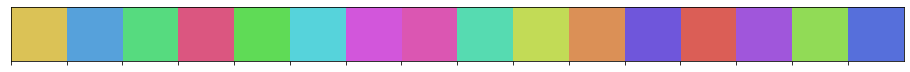

In [ ]:
colors =np.random.permutation(sns.color_palette("hls", k)).tolist()
sns.palplot(colors)
voles_comp.vs['color'] = [None]
for clid, cluster in enumerate(lead_voles):
    for member in cluster:
        voles_comp.vs[member]['color'] = colors[clid]

In [ ]:
#Define style from network plotting
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label"]=None
visual_style["vertex_color"] = voles_comp.vs['color']
visual_style["layout"] = layout_fr
visual_style["edge_width"] = 1


plt = ig.plot(voles_comp, **visual_style)
plt.save('leading_FR.png')

In [ ]:
lvn = voles_comp.community_multilevel(weights=None)
lvn.modularity

0.7794720160308716

In [ ]:
lvn1 = voles_comp.community_multilevel(weights="weight")
lvn1.modularity

0.8126695464209487

In [ ]:
## Louvain results in 14 (?) clusters. 
k=len(lvn)
k

17

In [ ]:
k1=len(lvn1)
k1

22

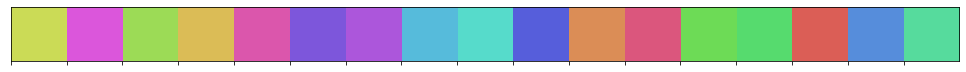

In [ ]:
colors =np.random.permutation(sns.color_palette("hls", k)).tolist()
sns.palplot(colors)
voles_comp.vs['color'] = [None]
for clid, cluster in enumerate(lvn):
    for member in cluster:
        voles_comp.vs[member]['color'] = colors[clid]

In [ ]:
#Define style from network plotting
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label"]=None
visual_style["vertex_color"] = voles_comp.vs['color']
visual_style["layout"] = layout_fr
visual_style["edge_width"] = 1


plt = ig.plot(voles_comp, **visual_style)
plt.save('Louvain_FR.png')

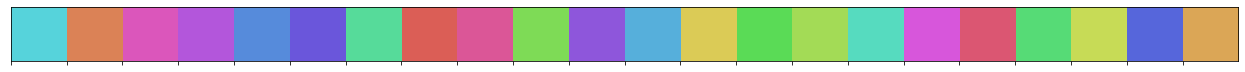

In [ ]:
colors =np.random.permutation(sns.color_palette("hls", k1)).tolist()
sns.palplot(colors)
voles_comp.vs['color'] = [None]
for clid, cluster in enumerate(lvn1):
    for member in cluster:
        voles_comp.vs[member]['color'] = colors[clid]
        #Define style from network plotting
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label"]=None
visual_style["vertex_color"] = voles_comp.vs['color']
visual_style["layout"] = layout_fr
visual_style["edge_width"] = 1


plt = ig.plot(voles_comp, **visual_style)
plt.save('Louvain__weight_FR.png')

In [ ]:
walktrap = voles_comp.community_walktrap()
walktrap_cl = walktrap.as_clustering()
walktrap_cl.modularity

0.7320102678071193

In [ ]:
## The Walk trap results in 72 clusters. 
k=len(walktrap_cl)
k

72

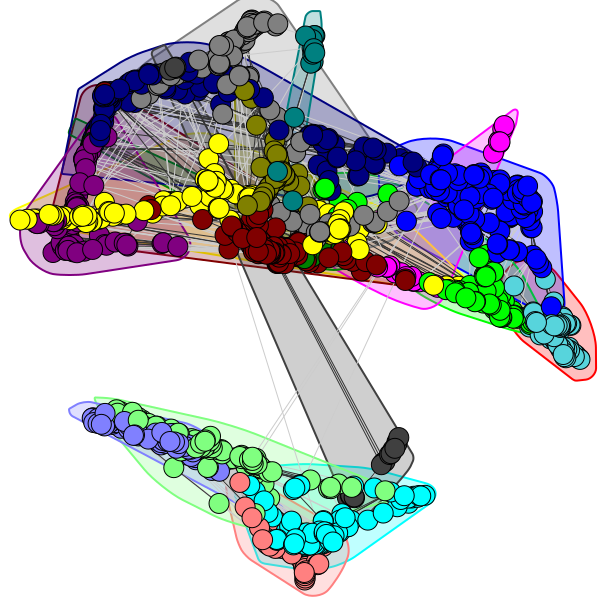

In [ ]:
plt_new = ig.plot(lvn, mark_groups = True)
plt_new

In [ ]:
## Edge Betweenness resulted in 17 clusters
edge_betw = voles_comp.community_edge_betweenness()
edge_betw_cl = edge_betw.as_clustering()
k=len(edge_betw_cl)
k
edge_betw_cl.modularity

0.7768941329754345

In [ ]:
## Fast Greedy resulted in 22 clusters
fastgreed = voles_comp.community_fastgreedy()
fastgreed_cl = fastgreed.as_clustering()
k=len(fastgreed_cl)
k

22

In [ ]:
fastgreed_cl.modularity

0.7188663580219036

In [ ]:
partition = la.find_partition(voles, la.ModularityVertexPartition)

     |████████████████████████████████| 1.4MB 10.9MB/s 


In [ ]:
new = voles.simplify(loops=True)

In [ ]:
plot_leiden1 = ig.plot(partition, mark_groups = True)
plot_leiden1.save('Leiden1.png')

In [ ]:
partition1 = la.find_partition(new, la.CPMVertexPartition,
                              resolution_parameter = 0.001)
k=len(partition1)
k #41
# 0.7265


In [ ]:
k=len(partition1)
k

41

In [ ]:
partition1.modularity

0.7265214663452559

In [ ]:
plot_leiden2 = ig.plot(partition1, mark_groups = True)
plot_leiden2.save('Leiden2.png')

In [ ]:
ig.compare_communities(lead_voles, walktrap_cl, method='nmi') 
# NMI is always a number between 0 and 1. 0 = no mutual information and 1 = perfect correlation

0.5793330678176836

In [ ]:
ig.compare_communities(lead_voles, lvn, method='nmi')
# NMI is always a number between 0 and 1.

0.6719491303497108

In [ ]:
ig.compare_communities(walktrap_cl, lvn, method='nmi')
# NMI is always a number between 0 and 1.

0.6287132423794457

In [ ]:
ig.compare_communities(walktrap_cl, edge_betw_cl, method='nmi')
ig.compare_communities(edge_betw_cl, lvn, method='nmi')
ig.compare_communities(edge_betw_cl, lead_voles, method='nmi')
ig.compare_communities(fastgreed_cl, lead_voles, method='nmi')
ig.compare_communities(fastgreed_cl, lvn, method='nmi')
ig.compare_communities(fastgreed_cl, edge_betw_cl, method='nmi')
ig.compare_communities(fastgreed_cl, walktrap_cl, method='nmi')




0.6432313809834639

In [ ]:
Q = ig.compare_communities(walktrap_cl, lvn1, method='nmi')
w = ig.compare_communities(edge_betw_cl,lvn1, method='nmi')
e = ig.compare_communities(lvn, lvn1, method='nmi')
r = ig.compare_communities(lead_voles, lvn1, method='nmi')
t = ig.compare_communities(fastgreed_cl, lvn1, method='nmi')



In [ ]:
u = ig.compare_communities(walktrap_cl, lvn1, method='adjusted_rand')
i = ig.compare_communities(edge_betw_cl,lvn1, method='adjusted_rand')
o = ig.compare_communities(lvn, lvn1, method='adjusted_rand')
p = ig.compare_communities(lead_voles, lvn1, method='adjusted_rand')
a = ig.compare_communities(fastgreed_cl, lvn1, method='adjusted_rand')

In [ ]:
a

0.3028003854277697

In [ ]:
a = ig.compare_communities(lead_voles, walktrap_cl, method='adjusted_rand') 
b = ig.compare_communities(lead_voles, lvn, method='adjusted_rand')
c = ig.compare_communities(walktrap_cl, lvn, method='adjusted_rand')
d= ig.compare_communities(walktrap_cl, edge_betw_cl, method='adjusted_rand')
e = ig.compare_communities(edge_betw_cl, lvn, method='adjusted_rand')
f = ig.compare_communities(edge_betw_cl, lead_voles, method='adjusted_rand')
g = ig.compare_communities(fastgreed_cl, lead_voles, method='adjusted_rand')
j = ig.compare_communities(fastgreed_cl, lvn, method='adjusted_rand')
l = ig.compare_communities(fastgreed_cl, edge_betw_cl, method='adjusted_rand')
k =ig.compare_communities(fastgreed_cl, walktrap_cl, method='adjusted_rand')

In [ ]:
k

0.3174893579055824

In [ ]:
# DEGENERACY
mod_list_lvn =[]
comm_list_lvn = []
memb_list_lvn = []
perm_list=[]

comm_list_lvn.append(lvn)
memb_list_lvn.append(lvn.membership)
mod_list_lvn.append(lvn.modularity)

nodes = voles_comp.vcount()

for i in range(1,6):
  perm=np.random.permutation(nodes).tolist()
  perm_voles = voles_comp.permute_vertices(perm)

  com = perm_voles.community_multilevel(weights = perm_voles.es["weight"])

  a = pd.DataFrame(data={'ID':perm_voles.vs()['id'],'cluster':com.membership})
  a = a.sort_values(by='ID')
  memb_list_lvn.append(a.loc[:,'cluster'].values)

  mod_list_lvn.append(com.modularity)
  comm_list_lvn.append(com)
  perm_list.append(perm)

In [ ]:
mod_list_lvn

[0.779921832010657,
 0.8147991074479538,
 0.8117233999268068,
 0.8118629630869539,
 0.8139676636165487,
 0.8147874124238889]

In [ ]:
for i in range(0,5):
  for j in range(i+1,6):
    rand=ig.compare_communities(memb_list_lvn[i], memb_list_lvn[j], 'rand')
    nmi = ig.compare_communities(memb_list_lvn[i], memb_list_lvn[j], 'nmi')
    print('Comparing permutations {} and {}, nmi={}, rand = {}'.format(i,j,nmi,rand))

Comparing permutations 0 and 1, nmi=0.23016547849534327, rand = 0.8821747618219831
Comparing permutations 0 and 2, nmi=0.2370402038052965, rand = 0.8805840880316411
Comparing permutations 0 and 3, nmi=0.2457592791042134, rand = 0.8852484235561251
Comparing permutations 0 and 4, nmi=0.23587460138544797, rand = 0.8802979513536879
Comparing permutations 0 and 5, nmi=0.23934663742755946, rand = 0.8790018752720989
Comparing permutations 1 and 2, nmi=0.8250483078416385, rand = 0.9632206682983637
Comparing permutations 1 and 3, nmi=0.804202129306369, rand = 0.9580548244028435
Comparing permutations 1 and 4, nmi=0.8465058515507141, rand = 0.966755840803398
Comparing permutations 1 and 5, nmi=0.8284807383401929, rand = 0.9586555575896216
Comparing permutations 2 and 3, nmi=0.8031402887676308, rand = 0.9578856037868497
Comparing permutations 2 and 4, nmi=0.8277320759837876, rand = 0.9590393807140802
Comparing permutations 2 and 5, nmi=0.8124707502770632, rand = 0.9569987339221184
Comparing permu

In [ ]:
m = pd.DataFrame(data={'Unweighted':memb_list_lvn[0], 
                       'p1':memb_list_lvn[1],
                       'p2':memb_list_lvn[2],
                       'p3':memb_list_lvn[3],
                       'p4':memb_list_lvn[4],
                       'p5':memb_list_lvn[5]})

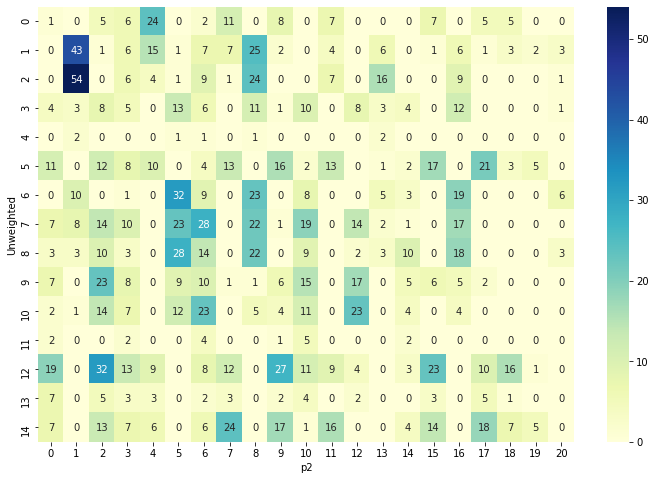

In [ ]:
# CHECK: DOES NOT WORK ######### Работает 
import pandas as pd
from matplotlib import pyplot as plt
contigency= pd.crosstab(m['Unweighted'], m['p2'])
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
# CHECK: DOES NOT WORK
from matplotlib import pyplot as plt
contigency= pd.crosstab(m['p2'], m['p4'])
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

NameError: ignored

In [ ]:
## LOUVAIN results in 20 clusters. 
k=len(comm_list_lvn[2])
print('Number of clusters {} with sizes = {}'.format(k, comm_list_lvn[2].sizes()))

Number of clusters 19 with sizes = [116, 123, 125, 135, 34, 89, 66, 33, 90, 65, 40, 82, 114, 154, 81, 117, 75, 61, 13]


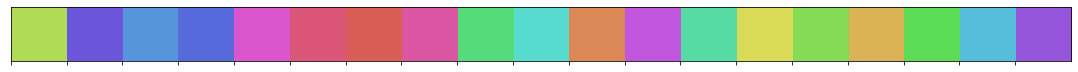

In [ ]:
# CHECK: DOES NOT WORK
# import pyplot as plt
colors =np.random.permutation(sns.color_palette("hls", k)).tolist()
#colors = sns.color_palette("hls", k)
sns.palplot(colors)
voles_comp.vs['color'] = [None]
for i in range(nodes):
     voles_comp.vs[i]['color'] = colors[memb_list_lvn[2][i]]

# Visualizations Clustering

In [ ]:
layout_fr = voles_comp.layout("fr")
layout_kk = voles_comp.layout("kamada_kawai")
layout_lgl = voles_comp.layout("lgl")
layout_drl = voles_comp.layout("drl")


In [ ]:
#Define style from network plotting: FR
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label"]=None
visual_style["vertex_color"] = voles_comp.vs['color']
visual_style["layout"] = layout_fr
visual_style["edge_width"] = 1


plt = ig.plot(voles_comp, **visual_style)
plt.save('Louvain_Weighted_FR.png')

In [ ]:
#Define style from network plotting: KK
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label"]=None
visual_style["vertex_color"] = voles_comp.vs['color']
visual_style["layout"] = layout_kk
visual_style["edge_width"] = 1


plt = ig.plot(voles_comp, **visual_style)
plt.save('Louvain_Weighted_KK.png')

In [ ]:
#Define style from network plotting: LGL
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label"]=None
visual_style["vertex_color"] = voles_comp.vs['color']
visual_style["layout"] = layout_lgl
visual_style["edge_width"] = 1


plt = ig.plot(voles_comp, **visual_style)
plt.save('Louvain_Weighted_LGL.png')

In [ ]:
#Define style from network plotting: DRL
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_label"]=None
visual_style["vertex_color"] = voles_comp.vs['color']
visual_style["layout"] = layout_drl
visual_style["edge_width"] = 1


plt = ig.plot(voles_comp, **visual_style)
plt.save('Louvain_Weighted_DRL.png')